In [ ]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.optimizers import Adam

%matplotlib inline

Dar load no Dataset e função de Visualização

In [ ]:
def load_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    #each image is mapped to one single label (class names not included)
    # CIFAR-10 classes
    classes= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    return (x_train, y_train), (x_test, y_test), classes

    # Analyzing the datasets (the prints on the right)
def analyze_data(x_train, y_train, x_test, y_test, classes):
    print(50*'*')
    print("Training set shape:", x_train.shape, "and testing set shape:", x_test.shape)

#Matplotlib it (a set of 9 figures)
def visualize_data(x_train, y_train, classes):
    plt.figure(figsize=(15,15))

    # Loop over the first 25 images
    for i in range(64):
      # Create a subplot for each image
      plt.subplot(8, 8, i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(x_train[i])

      # Set the label as the title
      plt.title(classes[y_train[i][0]], fontsize=12)

  # Display the figure
plt.show()

In [ ]:
import numpy as np

def rgb_to_gray(images):
    images = images.astype(float)
    # Grayscale conversion formula: Y = 0.299R + 0.587G + 0.114B
    grayscale_images = np.dot(images, [0.299, 0.587, 0.114])
    return grayscale_images

**************************************************
Training set shape: (50000, 32, 32, 3) and testing set shape: (10000, 32, 32, 3)


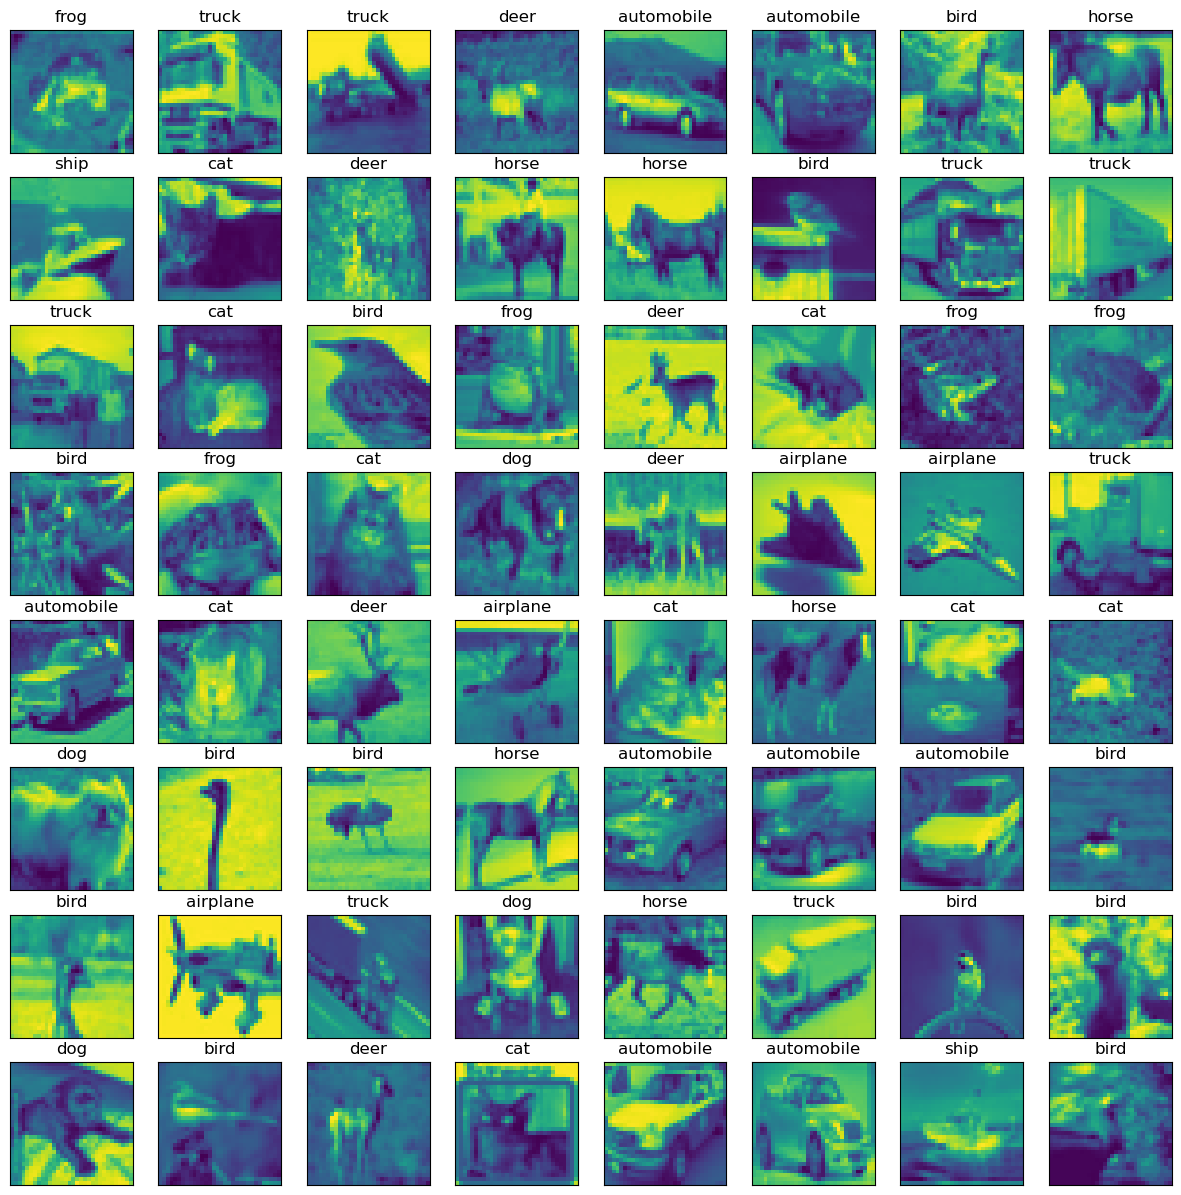

In [ ]:
#Pre-processing
def prepare_data():
    (x_train, y_train), (x_test, y_test), classes = load_data()
    analyze_data(x_train, y_train, x_test, y_test, classes)
    x_train = rgb_to_gray(x_train)
    x_test = rgb_to_gray(x_test)
    visualize_data(x_train, y_train, classes)
    #normalizing/scaling pixel values to [0, 1]
    x_train = x_train.astype('float32')/255.
    x_test = x_test.astype('float32')/255.
    x_train = x_train.reshape(x_train.shape[0], 32, 32, 1)
    x_test = x_test.reshape(x_test.shape[0], 32, 32, 1)
    return x_train, y_train, x_test, y_test, classes

x_train, y_train, x_test, y_test, classes = prepare_data()

Verificar se o dataset é bem distribuido

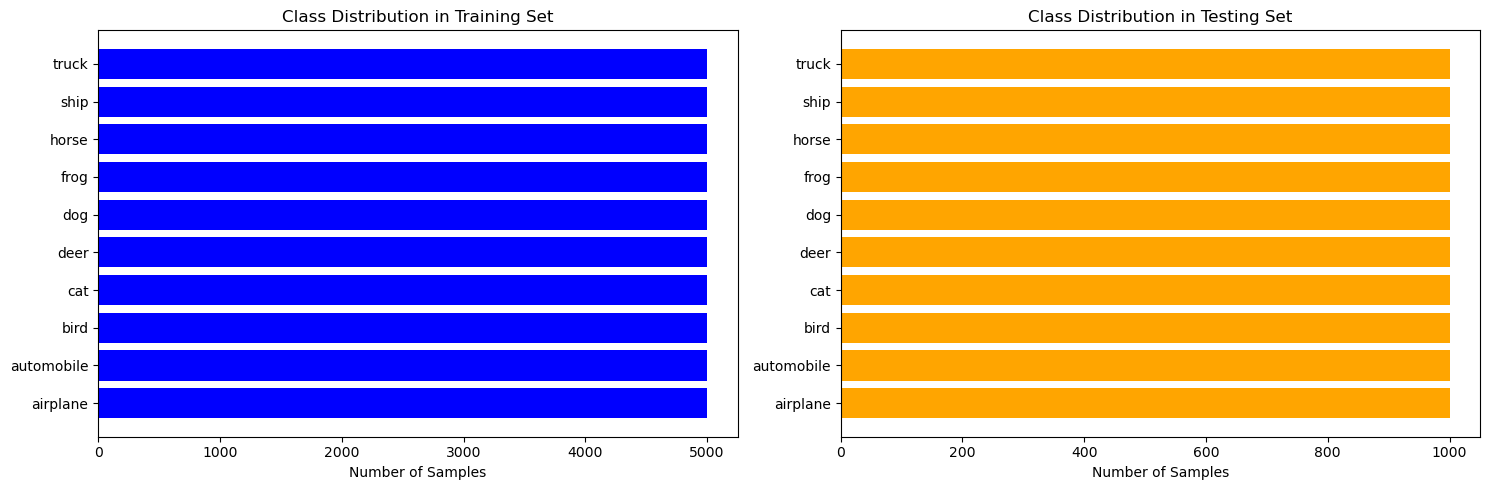

In [ ]:
train_classes, train_counts = np.unique(y_train, return_counts=True)
test_classes, test_counts = np.unique(y_test, return_counts=True)

# Set figure size and create subplots
plt.figure(figsize=(15, 5))

# Plot class distribution for training set
plt.subplot(1, 2, 1)
plt.barh(classes, train_counts, color='blue')
plt.xlabel('Number of Samples')
plt.title('Class Distribution in Training Set')

# Plot class distribution for testing set
plt.subplot(1, 2, 2)
plt.barh(classes, test_counts, color='orange')
plt.xlabel('Number of Samples')
plt.title('Class Distribution in Testing Set')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Dicionário de hiperparâmetros
hiperparameters = {
    'learning_rate': [0.001, 0.01],
    'neurons': [128, 512],
    'activation': ['relu', 'softmax'],
    'epochs': [10, 20]
}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras import models, layers
from keras.utils import to_categorical
import time
from tensorflow.keras.optimizers import Adam

def build_and_train_model(learning_rate, neurons, activation, epochs):
    model = models.Sequential(name="CNN_model")

    # Convolutional layers
    model.add(layers.Conv2D(neurons, (3, 3), activation=activation, padding='same', input_shape=(32, 32, 1)))
    model.add(layers.Conv2D(neurons, (3, 3), activation=activation, padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))  # Dropout layer to prevent overfitting
    model.add(layers.Conv2D(64, (3, 3), activation=activation, padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))  # Dropout layer

    # Flatten layer to transition from convolutional to dense layers
    model.add(layers.Flatten())

    # Dense (fully connected) layers with batch normalization and dropout
    model.add(layers.Dense(128, activation=activation))
    model.add(layers.BatchNormalization())  # Batch normalization layer
    model.add(layers.Dropout(0.5))  # Dropout layer
    model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 classes

    # Compile the model with suitable loss function and optimizer
    optimizer = Adam(learning_rate=learning_rate)  # Use Adam optimizer
    model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    model.summary()

    inicio = time.time()
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))
    fim = time.time()
    tempo_total = fim - inicio
    print("Tempo de execução:", tempo_total, "segundos")

    # Evaluate the model
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f'Teste accuracy: {test_acc}')

    return history, test_loss, test_acc, model, tempo_total

In [ ]:
from itertools import product
import math

all_results = []
best_model_CNN = [0,None,0,0]

i = 1
# Iterar sobre todas as combinações de hiperparâmetros
for learning_rate, neurons, activation, epochs in product(*hiperparameters.values()):
    print(f'*** Teste nº:{i} ***')
    print(f"Treinando modelo com learning_rate={learning_rate}, num_neurons={neurons}, funcao_de_ativacao={activation}, numero_de_epochs={epochs}")
    history_CNN, test_loss, test_acc, model_CNN, tempo_total = build_and_train_model(learning_rate, neurons, activation, epochs)

    print(f'Accuracy no conjunto de teste: {test_acc}')
    all_results.append([test_loss, test_acc, learning_rate, neurons, activation, epochs, tempo_total])

    if best_model_CNN[3] < test_acc:
        best_model_CNN = [i, history_CNN, test_loss, test_acc, model_CNN, learning_rate, neurons, activation, epochs, tempo_total]

    i = i+1

*** Teste nº:1 ***
Treinando modelo com learning_rate=0.001, num_neurons=128, funcao_de_ativacao=relu, numero_de_epochs=10
Model: "CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       1280      
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 128)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 


KeyboardInterrupt: 

In [ ]:
best_model_CNN

In [ ]:
import os
import tensorflow as tf

# Save the model in the specified directory
model = best_model_CNN[4]
model.save('best_model_CIFAR10_CNN.h5')

In [ ]:

# Guardar todos os resultados num csv
import csv
import os

csv_file_path = "resultados_cifar10/tuning_results_cifar10_CNN.csv"

# Create directory if it doesn't exist
os.makedirs(os.path.dirname(csv_file_path), exist_ok=True)

fieldnames = ["model_execution", "epochs", "learning_rate", "neurons", "activation_function", "test_loss", "accuracy", "tempo_execução"]

with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()

    model_execution = 1
    for result in all_results:
        [test_loss, test_acc, learning_rate, neurons, activation, epochs, tempo] = result
        writer.writerow({
            "model_execution": model_execution,
            "epochs": epochs,
            "learning_rate": learning_rate,
            "neurons": neurons,
            "activation_function": activation,
            "test_loss": test_loss,
            "accuracy": test_acc,
            "tempo_execução": tempo
        })
        model_execution += 1

print("CSV file created successfully.")

In [ ]:
import matplotlib.pyplot as plt

history_CNN = best_model_CNN[1]

# Plotting accuracy
plt.plot(history_CNN.history['accuracy'])
plt.plot(history_CNN.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()

In [ ]:
# Gráfico evolução Loss
plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Converter os rótulos de one-hot para rótulos de classe simples
y_pred_fc = np.argmax(model_CNN.predict(x_test), axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calcular a matriz de confusão
cm_fc = confusion_matrix(y_true=y_test_classes, y_pred=y_pred_fc)

print("Confusion Matrix:")
print(cm_fc)

In [ ]:
import seaborn as sns
import pandas as pd

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()